In [1]:
import pandas as pd
import numpy as np
import plotly.express as px

In [2]:
df = pd.read_csv("C:\\Users\\Pushkin\\OneDrive\\Desktop\\proj\\healthcare-dataset-stroke-data.csv")
df.head()

id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21   NaN     never smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smoked   

   stroke  
0       1  
1       1  
2       1  
3       1  
4       1

In [3]:
df.shape

(5110, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [5]:
df.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [6]:
df.describe()

id          age  hypertension  heart_disease  \
count   5110.000000  5110.000000   5110.000000    5110.000000   
mean   36517.829354    43.226614      0.097456       0.054012   
std    21161.721625    22.612647      0.296607       0.226063   
min       67.000000     0.080000      0.000000       0.000000   
25%    17741.250000    25.000000      0.000000       0.000000   
50%    36932.000000    45.000000      0.000000       0.000000   
75%    54682.000000    61.000000      0.000000       0.000000   
max    72940.000000    82.000000      1.000000       1.000000   

       avg_glucose_level          bmi       stroke  
count        5110.000000  4909.000000  5110.000000  
mean          106.147677    28.893237     0.048728  
std            45.283560     7.854067     0.215320  
min            55.120000    10.300000     0.000000  
25%            77.245000    23.500000     0.000000  
50%            91.885000    28.100000     0.000000  
75%           114.090000    33.100000     0.000000  
max           271.740000    97.600000     1.000000

In [7]:
df.describe(include='O') 

gender ever_married work_type Residence_type smoking_status
count     5110         5110      5110           5110           5110
unique       3            2         5              2              4
top     Female          Yes   Private          Urban   never smoked
freq      2994         3353      2925           2596           1892

In [8]:
numerical_cat = [col for col in df.columns if df[col].dtype != 'object']
numerical_cat

['id',
 'age',
 'hypertension',
 'heart_disease',
 'avg_glucose_level',
 'bmi',
 'stroke']

In [9]:
object_cat = [ col for col in df.columns if df[col].dtype == 'object']
object_cat

['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

In [10]:
# fill any missing values with mean of the respective column
for i in numerical_cat:
    df[i] = df[i].fillna(df[i].mean())

In [11]:
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [12]:
df.head()

id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   

       work_type Residence_type  avg_glucose_level        bmi  \
0        Private          Urban             228.69  36.600000   
1  Self-employed          Rural             202.21  28.893237   
2        Private          Rural             105.92  32.500000   
3        Private          Urban             171.23  34.400000   
4  Self-employed          Rural             174.12  24.000000   

    smoking_status  stroke  
0  formerly smoked       1  
1     never smoked       1  
2     never smoked       1  
3           smokes       1  
4     never smoked       1

In [13]:

df['ever_married'] = df['ever_married'].replace({'Yes':1,'No':0})
df_gen = df['gender'].value_counts().reset_index()
fig = px.pie(df_gen, values = 'gender', names = 'index', title = 'Gender')
fig.show()

In [14]:
df.head()

id  gender   age  hypertension  heart_disease  ever_married  \
0   9046    Male  67.0             0              1             1   
1  51676  Female  61.0             0              0             1   
2  31112    Male  80.0             0              1             1   
3  60182  Female  49.0             0              0             1   
4   1665  Female  79.0             1              0             1   

       work_type Residence_type  avg_glucose_level        bmi  \
0        Private          Urban             228.69  36.600000   
1  Self-employed          Rural             202.21  28.893237   
2        Private          Rural             105.92  32.500000   
3        Private          Urban             171.23  34.400000   
4  Self-employed          Rural             174.12  24.000000   

    smoking_status  stroke  
0  formerly smoked       1  
1     never smoked       1  
2     never smoked       1  
3           smokes       1  
4     never smoked       1

In [34]:
import matplotlib.pyplot as plt

In [16]:
!pip install dataprep 


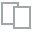
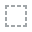
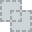
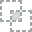
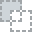
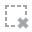
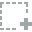
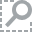
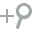
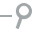
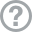
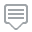
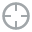
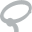
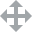
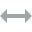
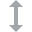
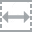
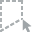
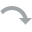
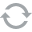
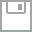
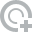
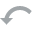
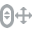
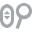
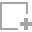
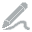
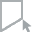
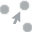
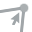
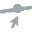

In [17]:
from dataprep.eda import plot

plot(df)


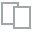
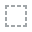
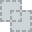
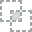
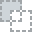
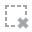
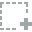
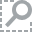
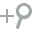
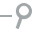
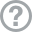
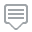
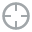
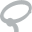
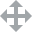
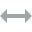
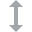
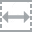
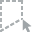
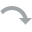
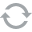
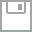
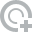
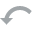
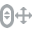
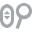
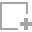
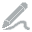
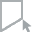
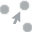
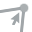
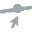

In [18]:
from dataprep.eda import plot_correlation

plot_correlation(df,'stroke')

In [19]:
from dataprep.eda import create_report
df.head()

id  gender   age  hypertension  heart_disease  ever_married  \
0   9046    Male  67.0             0              1             1   
1  51676  Female  61.0             0              0             1   
2  31112    Male  80.0             0              1             1   
3  60182  Female  49.0             0              0             1   
4   1665  Female  79.0             1              0             1   

       work_type Residence_type  avg_glucose_level        bmi  \
0        Private          Urban             228.69  36.600000   
1  Self-employed          Rural             202.21  28.893237   
2        Private          Rural             105.92  32.500000   
3        Private          Urban             171.23  34.400000   
4  Self-employed          Rural             174.12  24.000000   

    smoking_status  stroke  
0  formerly smoked       1  
1     never smoked       1  
2     never smoked       1  
3           smokes       1  
4     never smoked       1

In [16]:
# convert everything to numerical values for sklearn
df['gender'] = df['gender'].replace({'Male':1, 'Female':0, 'Other': 0.5})
df['Residence_type'] = df['Residence_type'].replace({'Urban':1, 'Rural':0})
df['work_type'] = df['work_type'].replace({'Private':4,'Self-employed':3,'Govt_job':2, 'children':1,'Never_worked':0})
df['smoking_status'] = df['smoking_status'].replace({'never smoked':0, 'Unknown':1, 'formerly smoked':2, 'smokes':3})
df.head()

id  gender   age  hypertension  heart_disease  ever_married  work_type  \
0   9046     1.0  67.0             0              1             1          4   
1  51676     0.0  61.0             0              0             1          3   
2  31112     1.0  80.0             0              1             1          4   
3  60182     0.0  49.0             0              0             1          4   
4   1665     0.0  79.0             1              0             1          3   

   Residence_type  avg_glucose_level        bmi  smoking_status  stroke  
0               1             228.69  36.600000               2       1  
1               0             202.21  28.893237               0       1  
2               0             105.92  32.500000               0       1  
3               1             171.23  34.400000               3       1  
4               0             174.12  24.000000               0       1

In [21]:
fig = px.imshow(df.corr(), text_auto = True, height = 850, width = 850)
fig.show()

In [22]:
df.head()

id  gender   age  hypertension  heart_disease  ever_married  work_type  \
0   9046     1.0  67.0             0              1             1          4   
1  51676     0.0  61.0             0              0             1          3   
2  31112     1.0  80.0             0              1             1          4   
3  60182     0.0  49.0             0              0             1          4   
4   1665     0.0  79.0             1              0             1          3   

   Residence_type  avg_glucose_level        bmi  smoking_status  stroke  
0               1             228.69  36.600000               2       1  
1               0             202.21  28.893237               0       1  
2               0             105.92  32.500000               0       1  
3               1             171.23  34.400000               3       1  
4               0             174.12  24.000000               0       1

In [17]:
df.drop('id',axis=1)

gender   age  hypertension  heart_disease  ever_married  work_type  \
0        1.0  67.0             0              1             1          4   
1        0.0  61.0             0              0             1          3   
2        1.0  80.0             0              1             1          4   
3        0.0  49.0             0              0             1          4   
4        0.0  79.0             1              0             1          3   
...      ...   ...           ...            ...           ...        ...   
5105     0.0  80.0             1              0             1          4   
5106     0.0  81.0             0              0             1          3   
5107     0.0  35.0             0              0             1          3   
5108     1.0  51.0             0              0             1          4   
5109     0.0  44.0             0              0             1          2   

      Residence_type  avg_glucose_level        bmi  smoking_status  stroke  
0                  1             228.69  36.600000               2       1  
1                  0             202.21  28.893237               0       1  
2                  0             105.92  32.500000               0       1  
3                  1             171.23  34.400000               3       1  
4                  0             174.12  24.000000               0       1  
...              ...                ...        ...             ...     ...  
5105               1              83.75  28.893237               0       0  
5106               1             125.20  40.000000               0       0  
5107               0              82.99  30.600000               0       0  
5108               0             166.29  25.600000               2       0  
5109               1              85.28  26.200000               1       0  

[5110 rows x 11 columns]

In [18]:
X = df.drop('stroke', axis = 1)
y = df['stroke']
X.head()
y.head()

0    1
1    1
2    1
3    1
4    1
Name: stroke, dtype: int64

In [19]:
X.head()

id  gender   age  hypertension  heart_disease  ever_married  work_type  \
0   9046     1.0  67.0             0              1             1          4   
1  51676     0.0  61.0             0              0             1          3   
2  31112     1.0  80.0             0              1             1          4   
3  60182     0.0  49.0             0              0             1          4   
4   1665     0.0  79.0             1              0             1          3   

   Residence_type  avg_glucose_level        bmi  smoking_status  
0               1             228.69  36.600000               2  
1               0             202.21  28.893237               0  
2               0             105.92  32.500000               0  
3               1             171.23  34.400000               3  
4               0             174.12  24.000000               0

In [20]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: stroke, dtype: int64

In [21]:
import sklearn

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [29]:
# Support Vector Machine (SVM)
svm = SVC()
svm.fit(X_train, y_train)
svm_pred = svm.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_pred)
print("SVM Accuracy:", svm_accuracy)

SVM Accuracy: 0.9393346379647749


In [30]:
# Random Forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)
print("Random Forest Accuracy:", rf_accuracy)


Random Forest Accuracy: 0.9393346379647749


In [31]:
for column in X.columns:
    print(column, X[column].dtype)

id int64
gender float64
age float64
hypertension int64
heart_disease int64
ever_married int64
work_type int64
Residence_type int64
avg_glucose_level float64
bmi float64
smoking_status int64


In [32]:
y.dtypes

dtype('int64')

In [33]:
X_train.shape

(4088, 11)

In [34]:
y_train.shape

(4088,)

In [35]:
X_train.isna().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
dtype: int64

In [36]:
y_train.isna().sum()

0

In [37]:
value_counts = y_train.value_counts()
value_counts

0    3901
1     187
Name: stroke, dtype: int64

In [38]:
from sklearn.model_selection import GridSearchCV
logreg_param = {
    'C': [0.1, 1, 10],
    'class_weight':['balanced', None],
    'penalty': [ 'l1', 'l2'],
    'solver': ['liblinear', 'lbfgs'],
    'max_iter': [1000, 5000],
    'random_state': [42, 101]
    }

LogReg_grid = GridSearchCV(LogisticRegression(), logreg_param, scoring='accuracy',cv=5, n_jobs=-1)
LogReg_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10], 'class_weight': ['balanced', None],
                         'max_iter': [1000, 5000], 'penalty': ['l1', 'l2'],
                         'random_state': [42, 101],
                         'solver': ['liblinear', 'lbfgs']},
             scoring='accuracy')

In [39]:
print("Beste Parameter - Logistic Regression:", LogReg_grid.best_params_)
print("\nBester Score - Logistic Regression:", LogReg_grid.best_score_)


y_pred = LogReg_grid.predict(X_test)

Beste Parameter - Logistic Regression: {'C': 0.1, 'class_weight': 'balanced', 'max_iter': 1000, 'penalty': 'l1', 'random_state': 42, 'solver': 'liblinear'}

Bester Score - Logistic Regression: 0.7314188410698093


In [40]:
print("\nTraining accuracy LogReg grid: ", LogReg_grid.score(X_train, y_train))  
print("Testing accuracy LogReg grid: ", LogReg_grid.score(X_test, y_test))

print("Test_Set")
#print(confusion_matrix(y_test, y_pred))
#print(classification_report(y_test, y_pred, zero_division=0))
print(' ')


Training accuracy LogReg grid:  0.7314090019569471
Testing accuracy LogReg grid:  0.738747553816047
Test_Set
 


In [41]:
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay, average_precision_score

In [42]:
print(confusion_matrix(y_test, y_pred))

[[707 253]
 [ 14  48]]


In [43]:
print(classification_report(y_test, y_pred, zero_division=0))
print(' ')

              precision    recall  f1-score   support

           0       0.98      0.74      0.84       960
           1       0.16      0.77      0.26        62

    accuracy                           0.74      1022
   macro avg       0.57      0.76      0.55      1022
weighted avg       0.93      0.74      0.81      1022

 


AttributeError: 'ConfusionMatrixDisplay' object has no attribute 'show'

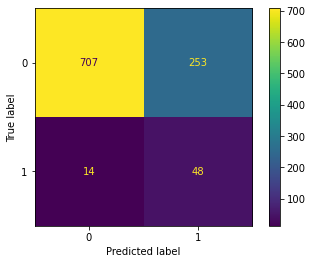

In [44]:
cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(cm)
plt = cm_display.plot()
plt.show()

In [46]:
import streamlit as st

In [47]:
svm_accuracy

0.9393346379647749

In [23]:
df.head()

id  gender   age  hypertension  heart_disease  ever_married  work_type  \
0   9046     1.0  67.0             0              1             1          4   
1  51676     0.0  61.0             0              0             1          3   
2  31112     1.0  80.0             0              1             1          4   
3  60182     0.0  49.0             0              0             1          4   
4   1665     0.0  79.0             1              0             1          3   

   Residence_type  avg_glucose_level        bmi  smoking_status  stroke  
0               1             228.69  36.600000               2       1  
1               0             202.21  28.893237               0       1  
2               0             105.92  32.500000               0       1  
3               1             171.23  34.400000               3       1  
4               0             174.12  24.000000               0       1

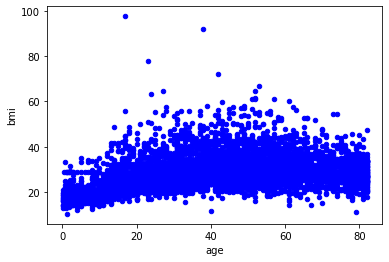

In [42]:
df.plot.scatter(x='age', y='bmi',color='b')

plt.show()